In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
df=pd.read_csv("6P_trainData.csv")

In [4]:
df1=pd.read_csv("Finance_trainData.csv")

In [5]:
df2=pd.read_csv("Netherlands_trainData.csv")

In [6]:
df3=pd.read_csv("UK_trainData.csv")

In [7]:
df4=pd.read_csv("Penetration_trainData.csv")

In [8]:
df.columns

Index(['Data_Source', 'Freq_of_Delivery', 'Region', 'COUNTRY',
       'Category_Group', 'Category', 'Market', 'Sector', 'Sector/Variance',
       'UL_/_Comp', 'Global_Manufacturer', 'Global_Brand', 'Local_Brand',
       'Measure_/_KPI', 'Primary_Key', '6P', 'Source', 'Supplier',
       'Measure_Type', 'Last_12W_2', 'Last_12W_1', 'L12W_1_Significance',
       'Last_12W', 'L12W_Significance', 'MAT_2', 'MAT_1', 'MAT_1_Significance',
       'MAT', 'MAT_Significance'],
      dtype='object')

In [9]:
df1.columns

Index(['Company code', 'Org Descripton', 'Sales Organization', 'Org Code',
       'Category', 'Brand', 'Key Customer', 'Geography', 'Fiscal year/period',
       '\nGross Sales Value (GSV)', '\nNIV', 'Turnover',
       'Acquisition Turnover', 'Turnover PY', 'Disposal Turnover',
       'Deflated CY Turnover', 'Deflated Acquisition Turnover',
       'Total Supply Chain Cost', 'Gross Profit',
       'Brand and Marketing Investment', 'PBO',
       'Deflated Turnover Hyper adjustment', 'SC Controlled Costs',
       'Underlying Operating Profit', 'Underlying Operating Profit by PCat',
       'Material Costs', 'Production Costs', 'Distribution Costs',
       'SC Overheads & Allocated SCC', 'Supply Chain Total Business Waste'],
      dtype='object')

In [10]:
df2.columns

Index(['Periods', 'Market Desc', 'CATEGORY', 'MARKET', 'COMPANY',
       'GLOBAL BRAND', 'BRAND', 'SEGMENT', 'Base Value', 'Promo Base Value',
       'Value Sales', 'Base Price per Unit', 'Price pr Unit',
       'Base Price per L/KG', 'Price pr L/KG'],
      dtype='object')

In [11]:
df3.columns

Index(['PERIOD', 'CATEGORY GROUP', 'CATEGORY', 'MARKET', 'COMPANY',
       'GLOBAL BRAND', 'BRAND', 'FORMAT', 'TYPE', 'TARGET USER', 'SUBBRAND',
       'VARIANT', 'ITEM', 'GB BRAND', 'ACTUAL PACK SIZE', 'Value Sales ('000)',
       'Volume Sales ('000)', 'Unit Sales ('000)'],
      dtype='object')

In [12]:
df4.columns

Index(['Year', 'Period View', 'Period', 'Date', 'Region', 'Country',
       'Category Group', 'Category', 'Category Segment', 'Category Detail',
       'UL / Comp', 'Global Manufacturer', 'Global Brand', 'Local Brand',
       'BE Tracker', 'Metric', 'Measure Type', 'Measure / KPI', 'Source',
       'Supplier', 'Absolute Value (Two years ago)',
       'Absolute Value (a year ago)', 'Absolute Value', 'Value Difference',
       'Significance', 'Frequency of Delivery', 'Demographic'],
      dtype='object')

### Trying to find relationship between "Nielsen Market Netherlands 2019 MAT Report_modified.xlsx" and "6Ps Data"

Extracting rows with country name as "Netherlands"

In [13]:
df5=df[df.COUNTRY=='Netherlands']
df5['Category']=df5['Category'].str.upper() 
df5 = df5.reset_index(drop=True)

/home/india/anaconda2/envs/pytorch_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The below code is for finding out the category that are common in Nielsen Market Netherlands 2019 MAT Report_modified.xlsx and above generated df5

In [14]:
column_values = df5['Category'].values.ravel()
column_values1 = df2['CATEGORY'].values.ravel()
unique_values =  np.intersect1d(pd.unique(column_values),pd.unique(column_values1))
unique_values

array(['DEODORANTS & FRAGRANCES', 'DRESSINGS', 'HAIR CARE', 'ICE CREAM',
       'ORAL CARE', 'OTHER FOODS', 'SAVOURY', 'SKIN CARE',
       'SKIN CLEANSING'], dtype=object)

Below code is to extract rows from Nielsen Market Netherlands 2019 MAT Report_modified.xlsx which are equal to unique_values

In [15]:
df6= df2[pd.DataFrame(df2.CATEGORY.tolist()).isin(unique_values).any(1)]
df6 = df6.reset_index(drop=True)

In [16]:
df5= df5[pd.DataFrame(df5.Category.tolist()).isin(unique_values).any(1)]
df5 = df5.reset_index(drop=True)

In [17]:
df5.columns

Index(['Data_Source', 'Freq_of_Delivery', 'Region', 'COUNTRY',
       'Category_Group', 'Category', 'Market', 'Sector', 'Sector/Variance',
       'UL_/_Comp', 'Global_Manufacturer', 'Global_Brand', 'Local_Brand',
       'Measure_/_KPI', 'Primary_Key', '6P', 'Source', 'Supplier',
       'Measure_Type', 'Last_12W_2', 'Last_12W_1', 'L12W_1_Significance',
       'Last_12W', 'L12W_Significance', 'MAT_2', 'MAT_1', 'MAT_1_Significance',
       'MAT', 'MAT_Significance'],
      dtype='object')

In [18]:
df6.columns

Index(['Periods', 'Market Desc', 'CATEGORY', 'MARKET', 'COMPANY',
       'GLOBAL BRAND', 'BRAND', 'SEGMENT', 'Base Value', 'Promo Base Value',
       'Value Sales', 'Base Price per Unit', 'Price pr Unit',
       'Base Price per L/KG', 'Price pr L/KG'],
      dtype='object')

Manually tried to compare different categories in df5 and df6

In [19]:
temp=[]
for i in range(len(unique_values)):
    p=0
    for j in range(len(df6)):
        if (df6["CATEGORY"][j]==unique_values[i]):
            p=p+1
    temp.append(p)
print(temp)

[1318, 2310, 4611, 5186, 714, 819, 4240, 1123, 3530]


In [20]:
temp=[]
for i in range(len(unique_values)):
    p=0
    for j in range(len(df5)):
        if (df5["Category"][j]==unique_values[i]):
            p=p+1
    temp.append(p)
print(temp)

[2150, 800, 1634, 730, 220, 30, 1182, 274, 526]


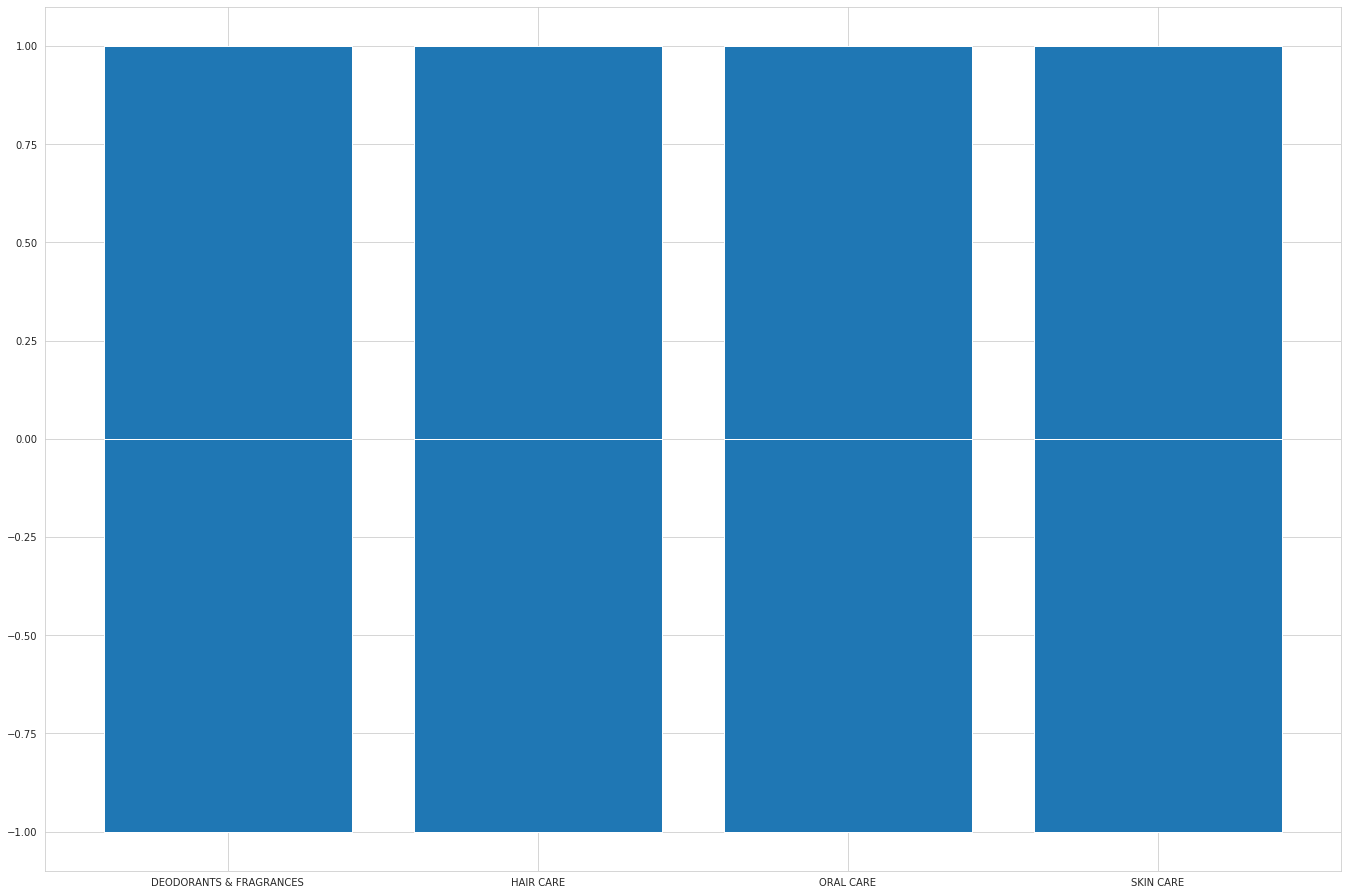

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar(df5["Category"][0:200], df5["MAT_Significance"][:200])
plt.show()

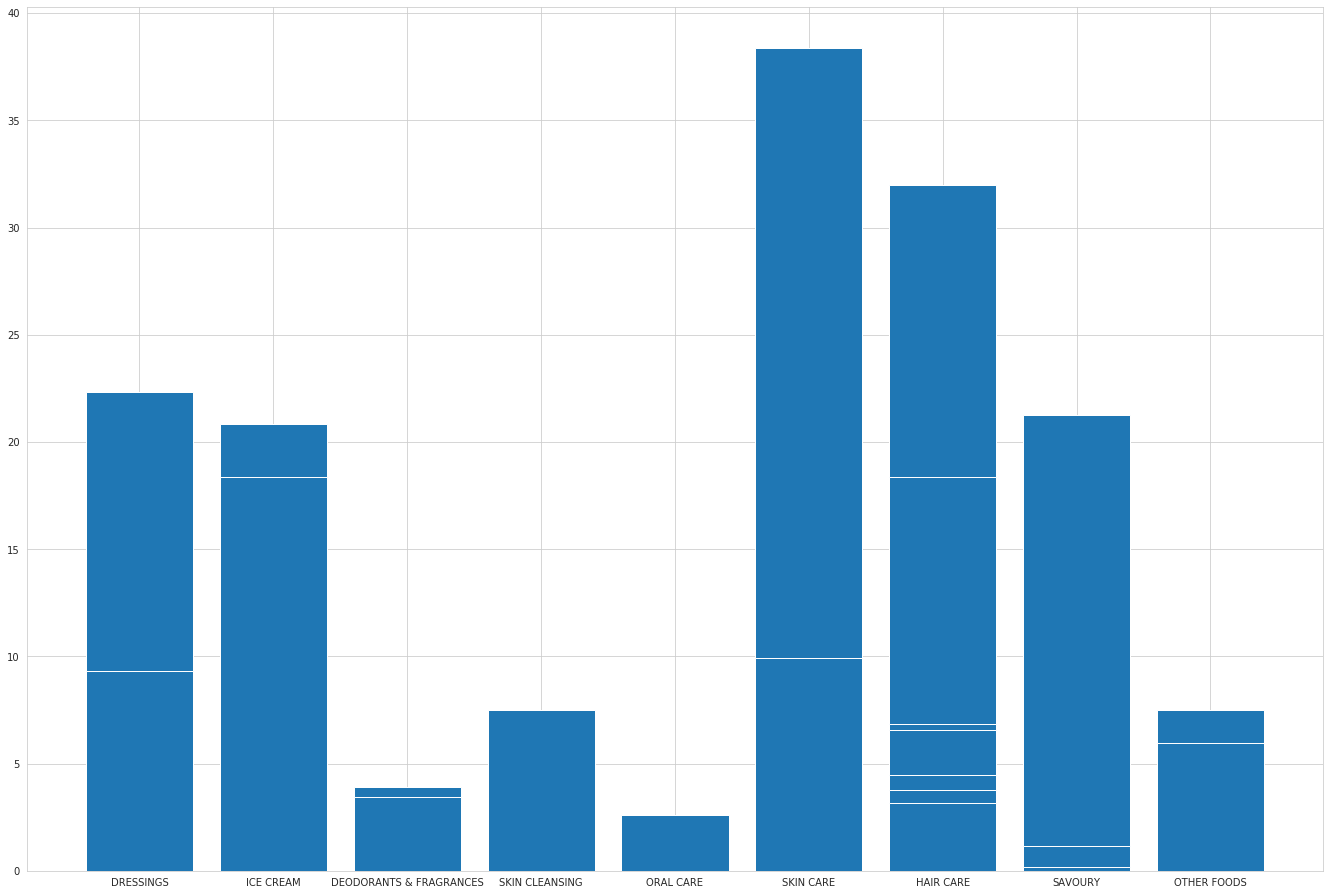

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar(df6["CATEGORY"][0:200], df6["Price pr L/KG"][:200])
plt.show()

Found no relation in the above code

### Trying to find Relationship between Nielsen Market UK Deodorants_modified.xlsx and Finance.xlsx

finding unique values in finance dataset "Fiscal year/period" column and UK dataset "PERIOD" column

In [24]:
column_values = df1['Fiscal year/period'].values.ravel()

unique_values =  pd.unique(column_values)
unique_values

array(['Period 11 2017', 'Period 12 2017'], dtype=object)

In [25]:
column_values = df3['PERIOD'].values.ravel()

unique_values =  pd.unique(column_values)
unique_values

array(['P4 2017', 'P5 2017', 'P6 2017', 'P7 2017', 'P8 2017', 'P9 2017',
       'P10 2017', 'P11 2017', 'P12 2017', 'P13 2017', 'P1 2018',
       'P2 2018', 'P3 2018', 'P4 2018', 'P5 2018', 'P6 2018', 'P7 2018',
       'P8 2018', 'P9 2018', 'P10 2018', 'P11 2018', 'P12 2018',
       'P13 2018', 'P1 2019', 'P2 2019', 'P3 2019', 'P4 2019', 'P5 2019',
       'P6 2019', 'P7 2019', 'P8 2019', 'P9 2019', 'P10 2019', 'P11 2019',
       'P12 2019', 'P13 2019', 'P1 2020'], dtype=object)

In [26]:
df7=df1[df1['Fiscal year/period']=="Period 11 2017"]
df7.append(df1[df1['Fiscal year/period']=="Period 11 2018"])

,Company code,Org Descripton,Sales Organization,Org Code,Category,Brand,Key Customer,Geography,Fiscal year/period,\nGross Sales Value (GSV),...,PBO,Deflated Turnover Hyper adjustment,SC Controlled Costs,Underlying Operating Profit,Underlying Operating Profit by PCat,Material Costs,Production Costs,Distribution Costs,SC Overheads & Allocated SCC,Supply Chain Total Business Waste
0,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Solero,OTHERS,Geo 1,Period 11 2017,1789140681013,...,3107.926443,0.0,-2084.601452,1887.321661,1887.724442,-3990.188733,-1063.313360,-735.547679,-2.373146e+02,-4.842578e+01
1,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Ben & Jerry's,ICE Cream,Geo 1,Period 11 2017,3640713901610,...,1743.861506,0.0,-1295.052092,1049.573992,1061.834495,-2270.211253,-674.539088,-446.380916,-1.397072e+02,-3.442490e+01
2,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Ola,MAF HYPERMARKET ABCDD PVT LIMITE,Geo 1,Period 11 2017,245517968347,...,0.116734,0.0,0.096700,-0.136099,0.116223,0.092800,-0.014100,0.103946,7.270000e-03,-3.520000e-04
3,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Swirl's,METRO HABIB CASH & CARRY ABCDD,Geo 1,Period 11 2017,8465290278781,...,0.111093,0.0,0.065500,-0.128897,0.111264,0.045600,0.000012,0.065500,2.400000e-07,1.000000e-07
4,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Eskimo,IMTIAZ PROVISION STORE,Geo 1,Period 11 2017,9656007049103,...,0.042792,0.0,0.000000,0.042792,0.042792,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Misa,OTHERS,Geo 1123,Period 11 2017,8797178336736,...,551.622140,0.0,-403.706236,337.253292,350.106482,-541.389083,-229.943837,-116.107520,-4.692400e+01,-1.073088e+01
282,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Max,OTHERS,Geo 1123,Period 11 2017,2788180395143,...,1.334917,0.0,0.000000,1.334917,1.334917,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
283,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Ben & Jerry's,MAF HYPERMARKET ABCDD PVT LIMITE,Geo 1123,Period 11 2017,6567061330952,...,0.496721,0.0,0.000000,0.496721,0.496721,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
284,13369,Unilever Indus Limited,ACF001,UIFL - Retail,ICE CREAM,Ola,METRO HABIB CASH & CARRY ABCDD,Geo 1123,Period 11 2017,1287969371722,...,1.016453,0.0,0.000000,1.016453,1.016453,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [27]:
column_values = df7['Category'].values.ravel()

unique_values =  pd.unique(column_values)
unique_values

array(['ICE CREAM', 'TEA', 'HAIR CARE', 'SKIN CARE', 'SKIN CLEANSING',
       'FABRIC SENSATIONS CA', 'FABRIC SOLUTIONS CAT', 'HOME & HYGIENE',
       'LIFE ESSENTIALS', 'ORAL CARE', 'Not assigned', 'DRESSINGS',
       'OTHER FOODS', 'SAVOURY'], dtype=object)

Finance dataset have no category "Deodorants" where as UK dataset is completely regarding Deodrants

### Trying to find relationship between penetrationa and UK datsets

In [28]:
df8=df4[df4.Category=='Deodorants & Fragrances']

In [29]:
df8.head(5)

,Year,Period View,Period,Date,Region,Country,Category Group,Category,Category Segment,Category Detail,...,Measure / KPI,Source,Supplier,Absolute Value (Two years ago),Absolute Value (a year ago),Absolute Value,Value Difference,Significance,Frequency of Delivery,Demographic
128,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,BPC,Deodorants & Fragrances,Deodorants,Deo Unidentified,...,Penetration,Household Panel,Worldpanel,0.0,95.59,96.85,1.26,1,Quarterly,Total
129,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,...,Penetration,Household Panel,Worldpanel,0.0,33.80,33.95,0.15,1,Quarterly,Total
130,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,...,Penetration,Household Panel,Worldpanel,0.0,16.28,15.83,-0.45,0,Quarterly,Total
131,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,...,Penetration,Household Panel,Worldpanel,0.0,8.87,7.69,-1.18,0,Quarterly,Total
132,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,...,Penetration,Household Panel,Worldpanel,0.0,8.20,8.41,0.21,1,Quarterly,Total


In [171]:
sub ="2017"
df9= df3[df3.PERIOD==df3["PERIOD"].str.find(sub)]
sub="2018"
df9=df9.append(df3[df3.PERIOD==df3["PERIOD"].str.find(sub)])


Deodorants & Fragrances values of 2017 and 2018 can be extracted from UK datset and can be compared with penetration dats set